<a href="https://www.kaggle.com/code/adithya013/titanic-prediction-model-1?scriptVersionId=296347565" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/kaggle/input/titanic-data/Titanic-Dataset.csv")
train_df = pd.read_csv("/kaggle/input/titanic-dataset-sep/train.csv")
test_df  = pd.read_csv("/kaggle/input/titanic-dataset-sep/test (1).csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [12]:
# fill missing values
df = df.drop(columns='Cabin')
df['Embarked']=df['Embarked'].fillna('S')
df=df.dropna()
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=le.fit_transform(df[column])

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Embarked         int64
dtype: object

In [16]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [17]:
# features and target
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
Y = df['Survived']

In [18]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [19]:
# ---------------- Logistic Regression ----------------
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, Y_train)
Y_pred_lr = model_lr.predict(X_test)
print("LOGISTIC REGRESSION")
print(classification_report(Y_test, Y_pred_lr))

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [20]:
# ---------------- Decision Tree ----------------
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, Y_train)
Y_pred_dt = model_dt.predict(X_test)
print("DECISION TREE")
print(classification_report(Y_test, Y_pred_dt))

DECISION TREE
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        87
           1       0.63      0.66      0.64        56

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.72      0.71      0.71       143



In [21]:
# ---------------- SVC ----------------
model_svc = SVC()
model_svc.fit(X_train, Y_train)
Y_pred_svc = model_svc.predict(X_test)
print("SVC")
print(classification_report(Y_test, Y_pred_svc))

SVC
              precision    recall  f1-score   support

           0       0.65      0.80      0.72        87
           1       0.53      0.34      0.41        56

    accuracy                           0.62       143
   macro avg       0.59      0.57      0.57       143
weighted avg       0.60      0.62      0.60       143



In [22]:
# ---------------- Random Forest ----------------
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
print("RANDOM FOREST")
print(classification_report(Y_test, Y_pred_rf))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        87
           1       0.70      0.71      0.71        56

    accuracy                           0.77       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



In [23]:
# --------- Collect reports ---------
models = {
    "Logistic Regression": Y_pred_lr,
    "Decision Tree": Y_pred_dt,
    "SVC": Y_pred_svc,
    "Random Forest": Y_pred_rf
}

rows = []

for model_name, y_pred in models.items():
    report = classification_report(Y_test, y_pred, output_dict=True)
    
    rows.append({
        "Model": model_name,
        "Accuracy": accuracy_score(Y_test, y_pred),
        "Precision (0)": report["0"]["precision"],
        "Recall (0)": report["0"]["recall"],
        "F1-score (0)": report["0"]["f1-score"],
        "Precision (1)": report["1"]["precision"],
        "Recall (1)": report["1"]["recall"],
        "F1-score (1)": report["1"]["f1-score"]
    })

In [24]:
# --------- Create DataFrame ---------
results_df = pd.DataFrame(rows)
print("MODEL COMPARISON TABLE")
print(results_df)

MODEL COMPARISON TABLE
                 Model  Accuracy  Precision (0)  Recall (0)  F1-score (0)  \
0  Logistic Regression  0.748252       0.780220    0.816092      0.797753   
1        Decision Tree  0.713287       0.773810    0.747126      0.760234   
2                  SVC  0.622378       0.654206    0.804598      0.721649   
3        Random Forest  0.769231       0.813953    0.804598      0.809249   

   Precision (1)  Recall (1)  F1-score (1)  
0       0.692308    0.642857      0.666667  
1       0.627119    0.660714      0.643478  
2       0.527778    0.339286      0.413043  
3       0.701754    0.714286      0.707965  


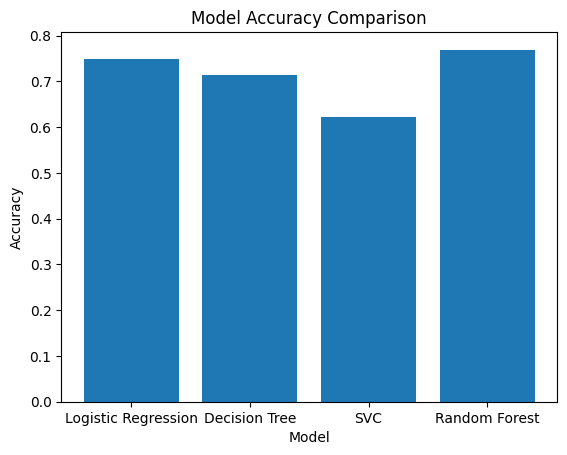

In [25]:
# --------- Visualization (Accuracy Comparison) ---------
plt.figure()
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [26]:
# Load test data
test_df = pd.read_csv("/kaggle/input/titanic-dataset-sep/test (1).csv")

# Save PassengerId
passenger_id = test_df['PassengerId']

# Preprocessing (same as training)
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Select ONLY model features
X_test_final = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Predict
predictions = model_rf.predict(X_test_final)

# Create submission dataframe (ONLY 2 columns)
submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Survived': predictions
})

# Save submission
submission.to_csv("submission.csv", index=False)

# Verify columns
print(submission.head())
print(submission.columns)


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1
Index(['PassengerId', 'Survived'], dtype='object')


In [27]:
submission.head()
submission.columns


Index(['PassengerId', 'Survived'], dtype='object')

In [28]:
!ls


__notebook__.ipynb  submission.csv
